# **MEDICAL INSURANCE COST**



**Problem Statement:Predicting Medical Costs for patients Based on demographic factors, lifestyle, health status, insurance plan type, family history, proximity to healthcare facilities, and primary care utilization.**



**Expected outcome:Develop a Predictive model for estimating medical costs based on the various features and actionable insights to optimize resource allocation and enhance healthcare services at Hospital ABC.**

# **Step1:Data Preprocessing**

**Importing the Dependencies**

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder

# Data Collection

In [127]:
#Loading the data from csv file to a pandas DataFrame
df=pd.read_csv("/content/medical data - Sheet1.csv")


In [128]:
#Number of rows and columns
df.shape

(1000, 35)

**Overview of the dataset**

* The dataset contain 1000 rows and 35 columns.
*Age: Age of the  individual ranges from 18 to 79.
*Sex: Gender of the individual.
*BMI: Body Mass Index, a measure of body fat based on height and weight.it ranges from 8.88 to 39.5
*Smoker: Binary variable indicating whether the individual is a smoker or non-smoker.
*Region: Geographic region where the insured individual resides.most of the people from south and north.
*Chronic condition include Heart Disease,Arthritis,High blood pressure,Diabetes.most of them suffering from Heart Disease.
*Insurance Plans include HMO (Health Maintenance Organization) HDHP (High Deductible Health Plan) and PPO( Preferred Provider Organization).
*Occupations include white-collar, retired, student, and blue-collar workers.
*Charges: Medical insurance charges range from 1910 to 19139.





   






In [129]:
#First 5 rows of the DataFrame
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,62,M,23.39610,4,Yes,East,White Collar,Rarely,Heart Disease,HMO,...,Easy,High,NaN,NaN,NaN,Other,NaN,1.0,18.0,7604.947
1,65,M,22.03668,4,Yes,North,Retired,2 times/week,Heart Disease,HDHP,...,Easy,Low,Moderate,Yes,Moderate,Asthma,NaN,0.0,1.0,7067.338
2,71,M,23.03985,1,No,North,Retired,Rarely,NaN,HMO,...,Moderate,High,NaN,NaN,Moderate,Obesity,Yes,2.0,15.0,4478.128
3,18,F,24.82284,0,Yes,North,Self Employed,Daily,Arthritis,PPO,...,NaN,NaN,NaN,NaN,High,Cancer,No,3.0,9.0,12944.880
4,21,M,23.44420,1,No,North,Professional,Daily,Arthritis,HDHP,...,Easy,Low,NaN,Yes,Moderate,Other,NaN,0.0,17.0,8275.411


In [130]:
#Last five rows of the dataframe
df.tail()

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
995,75,M,24.18366,3,No,West,Blue Collar,Daily,NaN,PPO,...,Easy,Moderate,Low,No,High,Hypertension,NaN,4.0,16.0,7344.957
996,24,F,36.91005,0,No,East,Student,3 times/week,Arthritis,HDHP,...,NaN,NaN,Low,Yes,High,Obesity,Yes,4.0,1.0,13072.180
997,37,M,25.34770,4,Yes,North,Blue Collar,3 times/week,High Blood Pressure,HMO,...,Moderate,Low,Low,NaN,Low,Hypertension,NaN,1.0,13.0,10463.350
998,52,F,26.18630,1,No,West,Retired,Once a week,High Blood Pressure,HMO,...,Moderate,Low,Moderate,Yes,High,Asthma,Yes,3.0,14.0,7296.749
999,68,M,31.11520,1,Yes,West,Blue Collar,Rarely,Arthritis,HDHP,...,NaN,Low,Moderate,No,Moderate,Obesity,Yes,0.0,5.0,7710.789


In [131]:
#getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1000 non-null   int64  
 1   Sex                            1000 non-null   object 
 2   BMI                            984 non-null    float64
 3   Children                       1000 non-null   int64  
 4   Smoker                         999 non-null    object 
 5   Region                         999 non-null    object 
 6   Occupation                     1000 non-null   object 
 7   Exercise_Frequency             1000 non-null   object 
 8   Chronic_Conditions             796 non-null    object 
 9   Insurance_Plan_Type            1000 non-null   object 
 10  Marital_Status                 1000 non-null   object 
 11  Distance_to_Nearest_Hospital   994 non-null    float64
 12  Income_Level                   1000 non-null   ob

* The Dataset contain numerical(int,float) and categorical values(object).
* some attribute have missing values.



In [132]:
#Checking duplicated values in the dataset
df.duplicated().sum()

0



* No Duplicates values in the dataset





In [133]:
#df.columns is used to retrieve the column Labels in the dataframe
df.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Occupation',
       'Exercise_Frequency', 'Chronic_Conditions', 'Insurance_Plan_Type',
       'Marital_Status', 'Distance_to_Nearest_Hospital', 'Income_Level',
       'Family_Medical_History', 'Primary_Care_Physician_Visits',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine',
       'Emergency_Room_Visits', 'Healthcare_Utilization', 'Charges'],
      dtype='object')

In [134]:
#It provide Descriptive statistics of the dataframe
df.describe()

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges
count,1000.000000,984.000000,1000.000000,994.000000,1000.000000,993.000000,994.000000,1000.000000
mean,48.167000,25.096119,1.918000,10.623046,4.964000,2.028197,10.151911,10149.250960
std,18.009427,4.929889,1.428747,5.449890,2.599897,1.414645,5.449028,3006.201159
min,18.000000,8.889366,0.000000,1.000381,1.000000,0.000000,1.000000,1910.048000
25%,33.000000,21.891128,1.000000,5.893609,3.000000,1.000000,6.000000,8193.242000
50%,48.000000,25.270985,2.000000,10.953870,5.000000,2.000000,10.000000,10228.765000
75%,64.000000,28.176527,3.000000,15.288303,7.000000,3.000000,15.000000,12157.125000
max,79.000000,39.558080,4.000000,19.996930,9.000000,4.000000,19.000000,19139.980000


**Finding the correlation between columns**

**Correlation:Correlation is a statistical measure that describes the degree of association or relationship between two variables.**

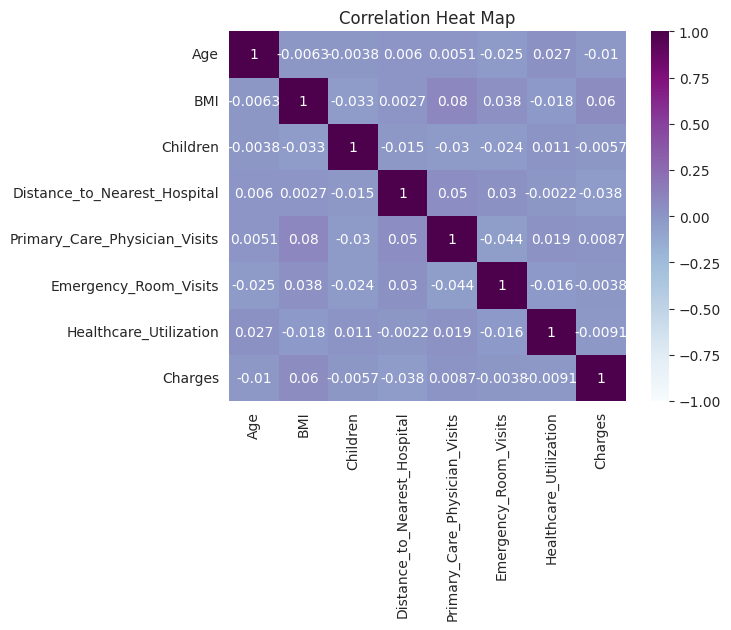

<Figure size 1500x1500 with 0 Axes>

In [135]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap="BuPu")
plt.title(f'Correlation Heat Map')
plt.figure(figsize=(15, 15))
plt.show()

#**Findings**
*  **Age and BMI** have a very low positive correlation of approximately 0.0063.So there is a little association between a person's age and their BMI.

* Charges has a relationship with both BMI and primary care physician visits  

In [136]:
df.isnull().sum()

Age                                0
Sex                                0
BMI                               16
Children                           0
Smoker                             1
Region                             1
Occupation                         0
Exercise_Frequency                 0
Chronic_Conditions               204
Insurance_Plan_Type                0
Marital_Status                     0
Distance_to_Nearest_Hospital       6
Income_Level                       0
Family_Medical_History             0
Primary_Care_Physician_Visits      0
Mental_Health_Status               0
Prescription_Medication_Usage      0
Employment_Status                252
Education_Level                  198
Dietary_Habits                   241
Alcohol_Consumption              240
Sleep_Quality                    214
Stress_Level                     245
Medication_Adherence             311
Physical_Activity                254
Access_to_Healthcare             264
Social_Support                   230
E

In [137]:
unwanted_columns = ['Occupation', 'Marital_Status', 'Prescription_Medication_Usage', 'Employment_Status',
                    'Education_Level', 'Dietary_Habits', 'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
                    'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare', 'Social_Support','Environmental_Factors',
                    'Genetic_Predisposition', 'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine',
                    'Emergency_Room_Visits',]



In [138]:
#Remove unwanted columns from the dataset
df.drop(columns=unwanted_columns, inplace=True)



* drop() function is used to remove rows or columns from the dataframe

* inplace=True means the data is modified in place,which means it will return nothing and the dataframe is now updated.



In [139]:
df.shape

(1000, 16)

In [140]:
#checking missing values
df.isnull().sum()

Age                                0
Sex                                0
BMI                               16
Children                           0
Smoker                             1
Region                             1
Exercise_Frequency                 0
Chronic_Conditions               204
Insurance_Plan_Type                0
Distance_to_Nearest_Hospital       6
Income_Level                       0
Family_Medical_History             0
Primary_Care_Physician_Visits      0
Mental_Health_Status               0
Healthcare_Utilization             6
Charges                            0
dtype: int64

In [141]:
#Handling missing values
df['Smoker'].fillna(df['Smoker'].mode()[0], inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['Region'].fillna(method='ffill', inplace=True)
df['Chronic_Conditions'].fillna(df['Chronic_Conditions'].mode()[0], inplace=True)
df['Distance_to_Nearest_Hospital'].fillna(df['Distance_to_Nearest_Hospital'].mean(), inplace=True)
df['Healthcare_Utilization'].fillna(df['Healthcare_Utilization'].mean(), inplace=True)




*   .fillna() is a method that replaces missing (NaN) values in a DataFrame or Series with a specified value.

*  df['Smoker'].mode() calculates the mode of the 'Smoker' column, which is the value that appears most frequently.

*   [0] is used to access the first (and potentially only) mode value from the mode calculation result. In case there are multiple modes, this selects the first one
*   method='ffill': It specifies the method to use for filling missing values. In this case, 'ffill' stands for "forward fill." With forward fill, missing values are replaced with the last observed non-null value in the column.
*   df['BMI'].mean(): This calculates the mean (average) of the 'BMI' column. It computes the sum of all non-null values in the column and divides it by the number of non-null values.

In [142]:
#check null values in the dataset
df.isnull().sum()

Age                              0
Sex                              0
BMI                              0
Children                         0
Smoker                           0
Region                           0
Exercise_Frequency               0
Chronic_Conditions               0
Insurance_Plan_Type              0
Distance_to_Nearest_Hospital     0
Income_Level                     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Mental_Health_Status             0
Healthcare_Utilization           0
Charges                          0
dtype: int64

* Now there is no missing values in the DataFrame.




# **Encoding the Categorical Features**

**Label Encoding:Encode the categorical values into numerical values.**

In [143]:
#Before Encoding
print("Unique values in Sex column before encoding:",df['Sex'].unique())
print("Unique values in Smoker column before encoding:",df['Smoker'].unique())
print("Unique values in Region column before encoding:",df['Region'].unique())
print("Unique values in Exercise Frequency column before encoding:",df['Exercise_Frequency'].unique())
print("Unique values in Chronic Conditions column before encoding:",df['Chronic_Conditions'].unique())
print("Unique values in Insurance plan type column before encoding:",df['Insurance_Plan_Type'].unique())

Unique values in Sex column before encoding: ['M' 'F']
Unique values in Smoker column before encoding: ['Yes' 'No']
Unique values in Region column before encoding: ['East' 'North' 'South' 'West']
Unique values in Exercise Frequency column before encoding: ['Rarely' '2 times/week' 'Daily' '3 times/week' 'Once a week']
Unique values in Chronic Conditions column before encoding: ['Heart Disease' 'Arthritis' 'High Blood Pressure' 'Diabetes']
Unique values in Insurance plan type column before encoding: ['HMO' 'HDHP' 'PPO']


In [144]:
#Before Encoding
print("Unique values in Income level column before encoding:",df['Income_Level'].unique())
print("Unique values in Family medical history column before encoding:",df['Family_Medical_History'].unique())
print("Unique values in Mental health status column before encoding:",df['Mental_Health_Status'].unique())


Unique values in Income level column before encoding: ['Low' 'High' 'Medium']
Unique values in Family medical history column before encoding: ['Yes' 'No']
Unique values in Mental health status column before encoding: ['Poor' 'Good' 'Excellent' 'Fair']


In [145]:
#AFTER Encoding
label_encoder=LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["Sex"])
df["smoker"]=label_encoder.fit_transform(df["Smoker"])
df["region"]=label_encoder.fit_transform(df["Region"])
df["exercise_frequency"]=label_encoder.fit_transform(df["Exercise_Frequency"])
df["chronic_conditions"]=label_encoder.fit_transform(df["Chronic_Conditions"])
df["insurance_plan_type"]=label_encoder.fit_transform(df["Insurance_Plan_Type"])
df["income_level"]=label_encoder.fit_transform(df["Income_Level"])
df["family_medical_history"]=label_encoder.fit_transform(df["Family_Medical_History"])
df["mental_health_status"]=label_encoder.fit_transform(df["Mental_Health_Status"])


In [146]:
print("Unique values in Sex_encoded column after encoding:",df['sex'].unique())
print("Unique values in Smoker_encoded column after encoding:",df['smoker'].unique())
print("Unique values in Region_encoded column after encoding:",df['region'].unique())
print("Unique values in Chronic conditions_encoded column after encoding:",df['chronic_conditions'].unique())
print("Unique values in Exercise frequency_encoded column after encoding:",df['exercise_frequency'].unique())
print("Unique values in Insurance plan type_encoded column after encoding:",df['insurance_plan_type'].unique())
print("Unique values in Income level_encoded column after encoding:",df['income_level'].unique())
print("Unique values in Family medical history_encoded column after encoding:",df['family_medical_history'].unique())
print("Unique values in Mental health status_encoded column after encoding:",df['mental_health_status'].unique())


Unique values in Sex_encoded column after encoding: [1 0]
Unique values in Smoker_encoded column after encoding: [1 0]
Unique values in Region_encoded column after encoding: [0 1 2 3]
Unique values in Chronic conditions_encoded column after encoding: [2 0 3 1]
Unique values in Exercise frequency_encoded column after encoding: [4 0 2 1 3]
Unique values in Insurance plan type_encoded column after encoding: [1 0 2]
Unique values in Income level_encoded column after encoding: [1 0 2]
Unique values in Family medical history_encoded column after encoding: [1 0]
Unique values in Mental health status_encoded column after encoding: [3 2 0 1]


In [147]:
df=df.drop(['Sex','Smoker','Region','Exercise_Frequency','Chronic_Conditions','Insurance_Plan_Type','Income_Level','Family_Medical_History','Mental_Health_Status',], axis=1)

#Calculation of Skewness

skewness: Skewness refers to the asymmetry of the distribution of the data values, which can be either positive or negative. Positive skewness means that most of data is clustered around the lower end, while negative skewness means that most of data is clustered around the higher end.

In [148]:
# Calculate skewness for each column in the DataFrame
column_skewness = df.skew()
print("skewness for each column:")
print(column_skewness)


skewness for each column:
Age                             -0.007953
BMI                             -0.096238
Children                         0.107372
Distance_to_Nearest_Hospital    -0.063776
Primary_Care_Physician_Visits   -0.007686
Healthcare_Utilization          -0.038956
Charges                         -0.058278
sex                              0.056106
smoker                          -0.044077
region                          -0.051932
exercise_frequency               0.056205
chronic_conditions              -0.292779
insurance_plan_type             -0.001856
income_level                     0.031095
family_medical_history          -0.024038
mental_health_status            -0.048653
dtype: float64


# Outlier Detection And Removal

**outlier**:An outlier is a datapoint that is significantly different from other data point in a dataset

**Outlier Detection Using Box plot**

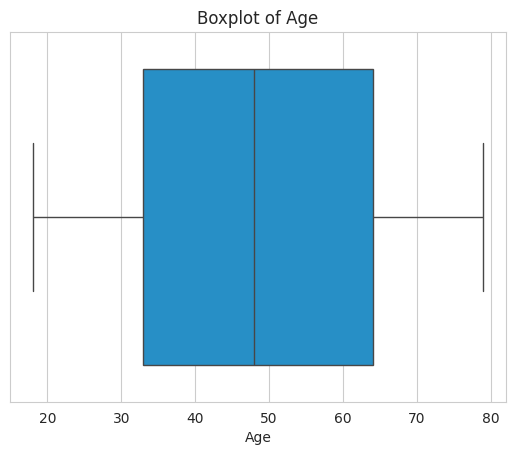

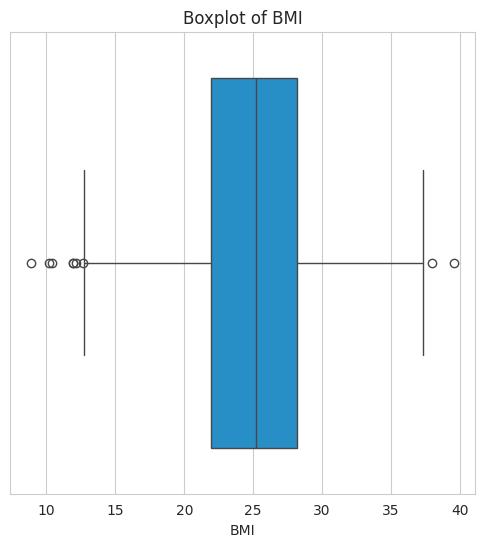

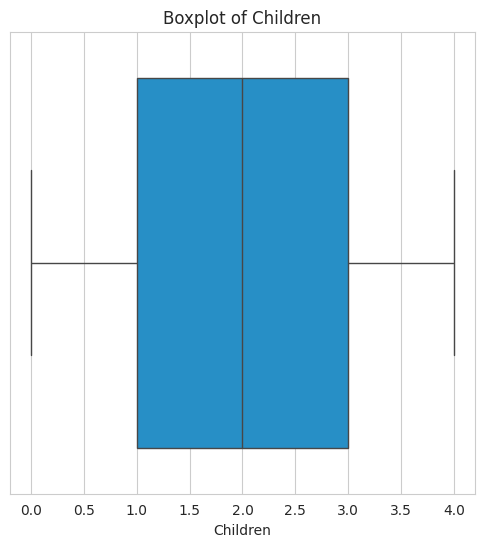

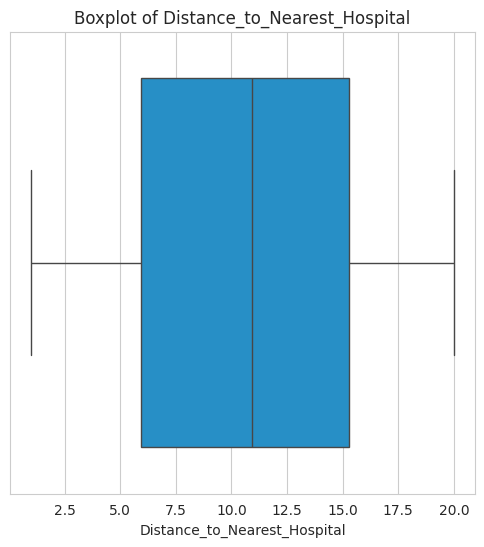

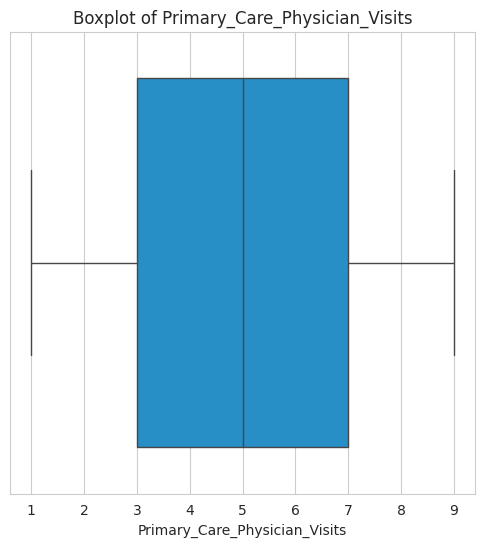

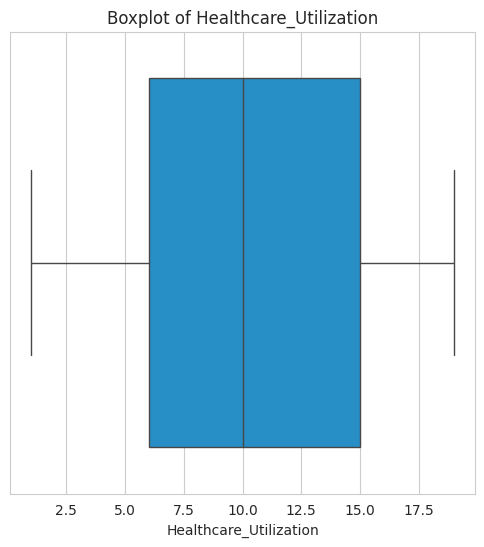

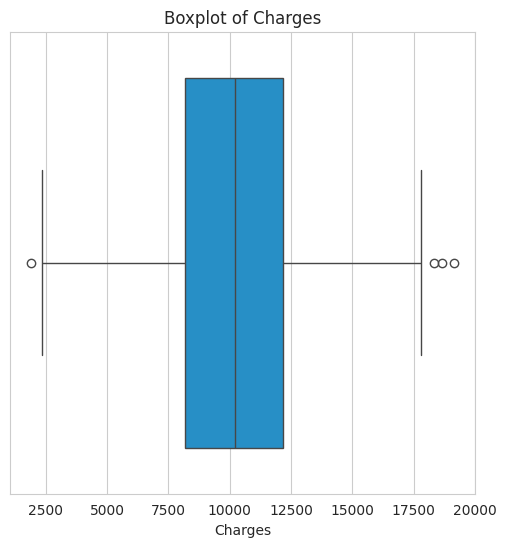

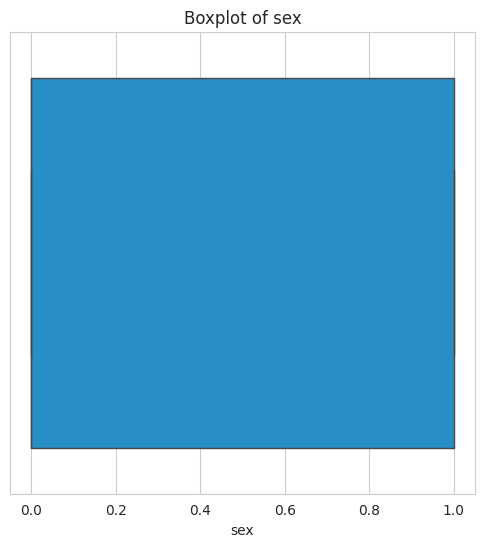

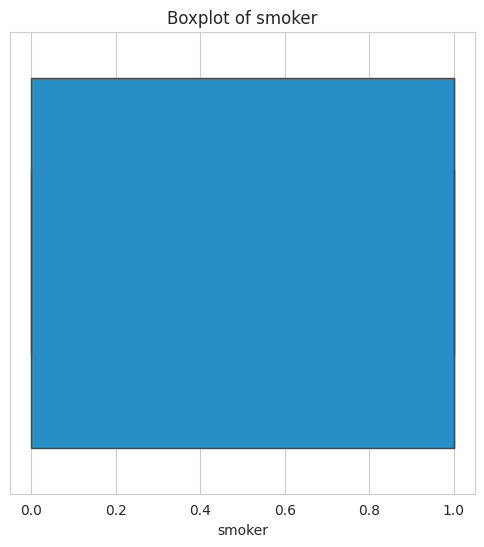

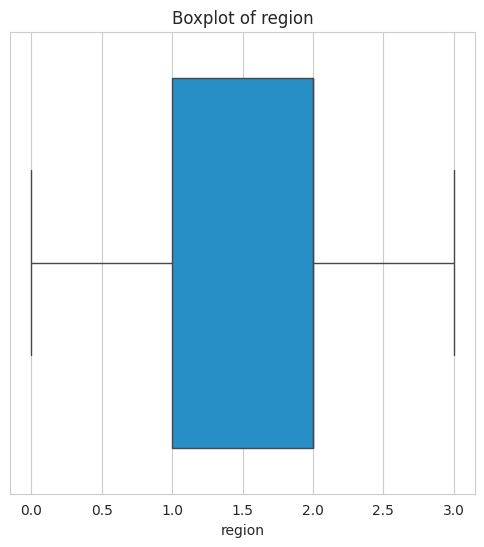

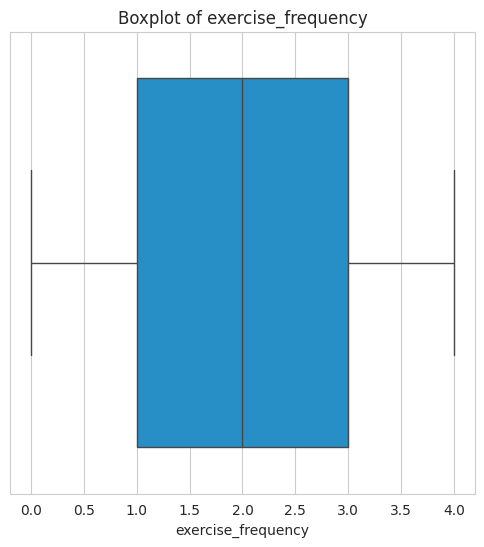

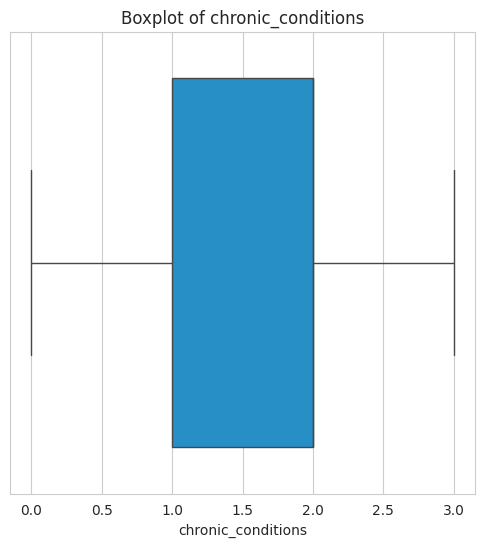

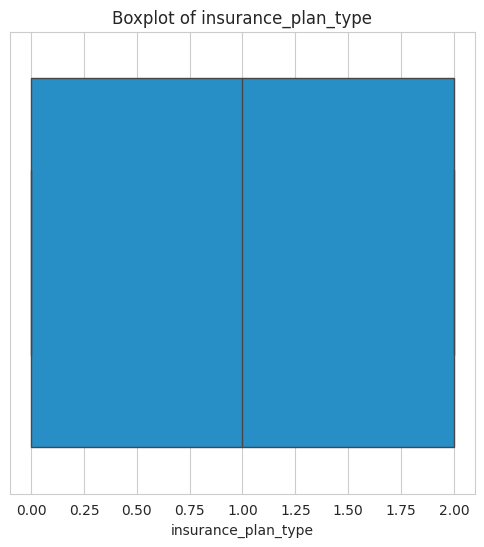

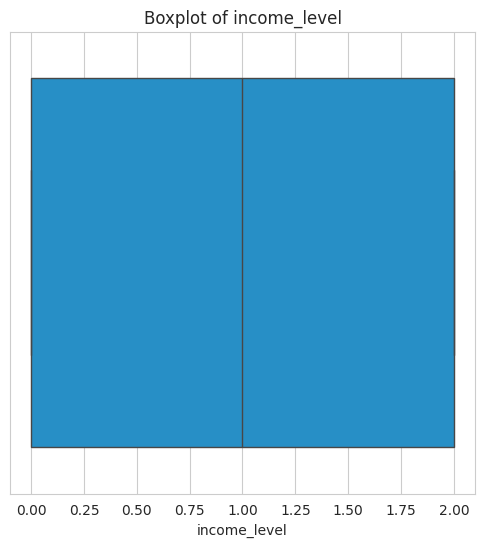

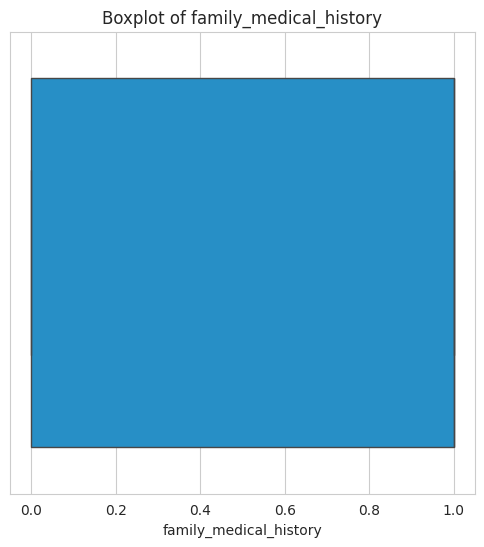

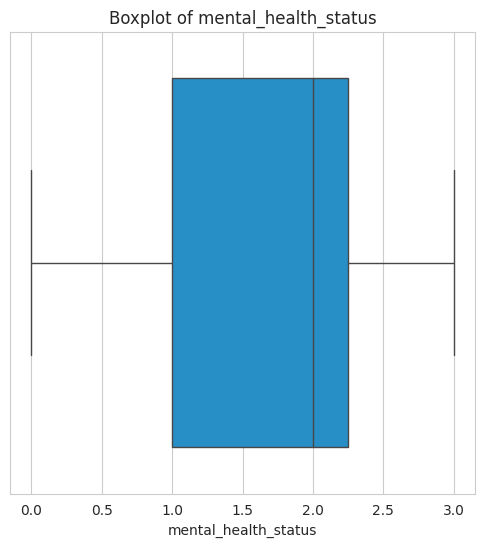

<Figure size 600x600 with 0 Axes>

In [149]:
n=['Age','BMI','Children','Distance_to_Nearest_Hospital','Primary_Care_Physician_Visits','Healthcare_Utilization','Charges','sex','smoker','region','exercise_frequency','chronic_conditions','insurance_plan_type','income_level','family_medical_history','mental_health_status']
for i in n:
  sns.boxplot(x=df[i], color='#0d97e0')
  plt.title(f"Boxplot of {i}")
  plt.xlabel(i)
  plt.show()
  plt.figure(figsize=(6,6))

BMI and Charges column contain outliers.

# Handling The Outlier of **BMI**

Inter Quantile Range(IQR):Interquartile range is the difference between the first and third quartiles (Q1 and Q3).
* The middle half of the data is between the first and third quartile.
* The first quartile is the value in the data that separates the bottom 25% of values from the top 75%.
*The third quartile is the value in the data
that separates the bottom 75% of the values from the top 25%.








In [150]:
Q1=df['BMI'].quantile(0.25)
Q2=df['BMI'].quantile(0.5)
Q3=df['BMI'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)


lower_limit 12.659298749999998
upper_limit 37.43572875


In [151]:
df[df['BMI'] > upper_limit]

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Healthcare_Utilization,Charges,sex,smoker,region,exercise_frequency,chronic_conditions,insurance_plan_type,income_level,family_medical_history,mental_health_status
201,58,38.00440,0,11.00301,7,7.0,10706.87,1,0,2,4,2,2,0,1,2
408,59,39.55808,4,10.37859,4,19.0,10753.11,1,1,1,3,2,0,1,1,3


In [152]:
df[df['BMI'] < lower_limit]

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Healthcare_Utilization,Charges,sex,smoker,region,exercise_frequency,chronic_conditions,insurance_plan_type,income_level,family_medical_history,mental_health_status
5,77,11.955290,3,3.762632,1,13.0,4008.173,1,1,0,0,2,2,2,1,2
273,65,10.191750,2,13.249550,2,13.0,12250.550,1,1,1,0,3,1,0,0,0
345,79,10.418080,3,18.762250,5,6.0,9361.401,1,1,0,2,0,2,2,0,3
463,33,12.136450,0,11.820710,3,19.0,12613.100,1,0,1,3,2,0,1,1,3
510,75,11.927020,2,10.620690,5,19.0,5221.695,0,0,1,4,0,0,2,0,1
792,55,12.625260,0,18.338360,9,19.0,8028.492,1,0,0,1,2,1,0,1,3
904,18,8.889366,2,1.606622,1,17.0,9239.522,1,1,1,1,2,1,2,1,1


In [153]:
#Capping
new_df=df.copy()
new_df['BMI']=np.where(new_df['BMI'] > upper_limit, upper_limit,
                           np.where(new_df['BMI'] < lower_limit, lower_limit, new_df['BMI']))

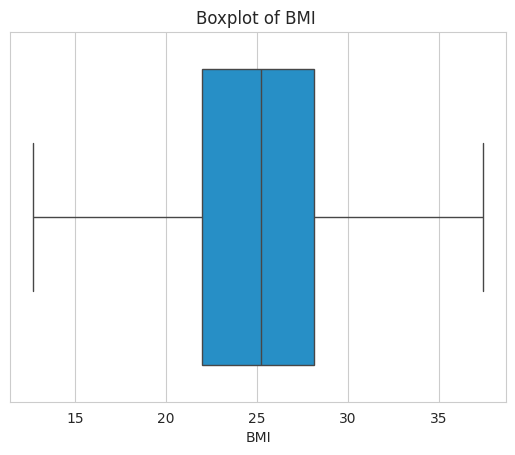

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [154]:
sns.boxplot(x=new_df['BMI'],color='#0d97e0')
plt.title(f"Boxplot of BMI ")
plt.xlabel('BMI')
plt.show()
plt.figure(figsize=(6,6))

# Handling The Outlier of Charges

In [155]:
Q1=df['Charges'].quantile(0.25)
Q2=df['Charges'].quantile(0.5)
Q3=df['Charges'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)



lower_limit 2247.4175000000005
upper_limit 18102.9495


In [156]:
df[df['Charges'] > upper_limit]

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Healthcare_Utilization,Charges,sex,smoker,region,exercise_frequency,chronic_conditions,insurance_plan_type,income_level,family_medical_history,mental_health_status
299,43,25.61344,1,11.096430,4,2.0,18334.81,0,1,1,4,2,2,2,0,1
310,27,24.69395,2,12.022860,2,13.0,18664.49,0,0,2,4,0,2,2,1,2
317,68,20.01403,0,1.810634,7,5.0,19139.98,1,0,0,0,2,1,2,0,3


In [157]:
df[df['Charges'] > lower_limit]

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Healthcare_Utilization,Charges,sex,smoker,region,exercise_frequency,chronic_conditions,insurance_plan_type,income_level,family_medical_history,mental_health_status
0,62,23.39610,4,5.112872,9,18.0,7604.947,1,1,0,4,2,1,1,1,3
1,65,22.03668,4,19.006750,3,1.0,7067.338,1,1,1,0,2,0,0,0,3
2,71,23.03985,1,9.624294,9,15.0,4478.128,1,0,1,4,2,1,2,1,3
3,18,24.82284,0,11.869340,7,9.0,12944.880,0,1,1,2,0,2,2,1,3
4,21,23.44420,1,15.146110,6,17.0,8275.411,1,0,1,2,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75,24.18366,3,5.041508,1,16.0,7344.957,1,0,3,2,2,2,1,0,2
996,24,36.91005,0,11.672830,1,1.0,13072.180,0,0,0,1,0,0,2,1,3
997,37,25.34770,4,15.267760,9,13.0,10463.350,1,1,1,1,3,1,1,0,2
998,52,26.18630,1,11.871490,8,14.0,7296.749,0,0,3,3,3,1,2,0,2


In [158]:
#Capping
new_df=df.copy()
new_df['Charges']=np.where(new_df['Charges'] > upper_limit, upper_limit,
                           np.where(new_df['Charges'] < lower_limit, lower_limit, new_df['Charges']))

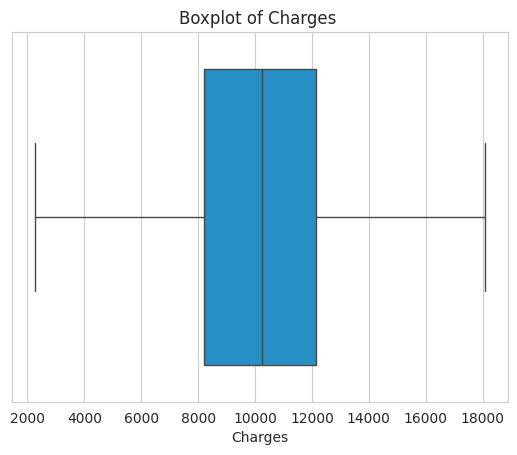

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [159]:
sns.boxplot(x=new_df['Charges'],color='#0d97e0')
plt.title(f"Boxplot of Charges ")
plt.xlabel('Charges')
plt.show()
plt.figure(figsize=(6,6))



* Now there is no more outliers in the BMI and Charges column.



In [160]:
new_df.describe()

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Healthcare_Utilization,Charges,sex,smoker,region,exercise_frequency,chronic_conditions,insurance_plan_type,income_level,family_medical_history,mental_health_status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.167000,25.096119,1.918000,10.623046,4.964000,10.151911,10147.757898,0.486000,0.511000,1.544000,1.924000,1.604000,1.001000,0.983000,0.506000,1.548000
std,18.009427,4.890251,1.428747,5.433499,2.599897,5.432640,3000.199946,0.500054,0.500129,1.083161,1.435369,1.014995,0.824426,0.812016,0.500214,1.088522
min,18.000000,8.889366,0.000000,1.000381,1.000000,1.000000,2247.417500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,21.950460,1.000000,5.932067,3.000000,6.000000,8193.242000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,48.000000,25.214975,2.000000,10.905765,5.000000,10.000000,10228.765000,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
75%,64.000000,28.144568,3.000000,15.263208,7.000000,15.000000,12157.125000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.250000
max,79.000000,39.558080,4.000000,19.996930,9.000000,19.000000,18102.949500,1.000000,1.000000,3.000000,4.000000,3.000000,2.000000,2.000000,1.000000,3.000000


In [161]:

new_df.shape

(1000, 16)



*  our dataset will be fine tuned and cleansed during preprocessing.



# **Step2:Exploratory Data Analysis(EDA)**

Text(0.5, 1.0, 'Age vs Charges')

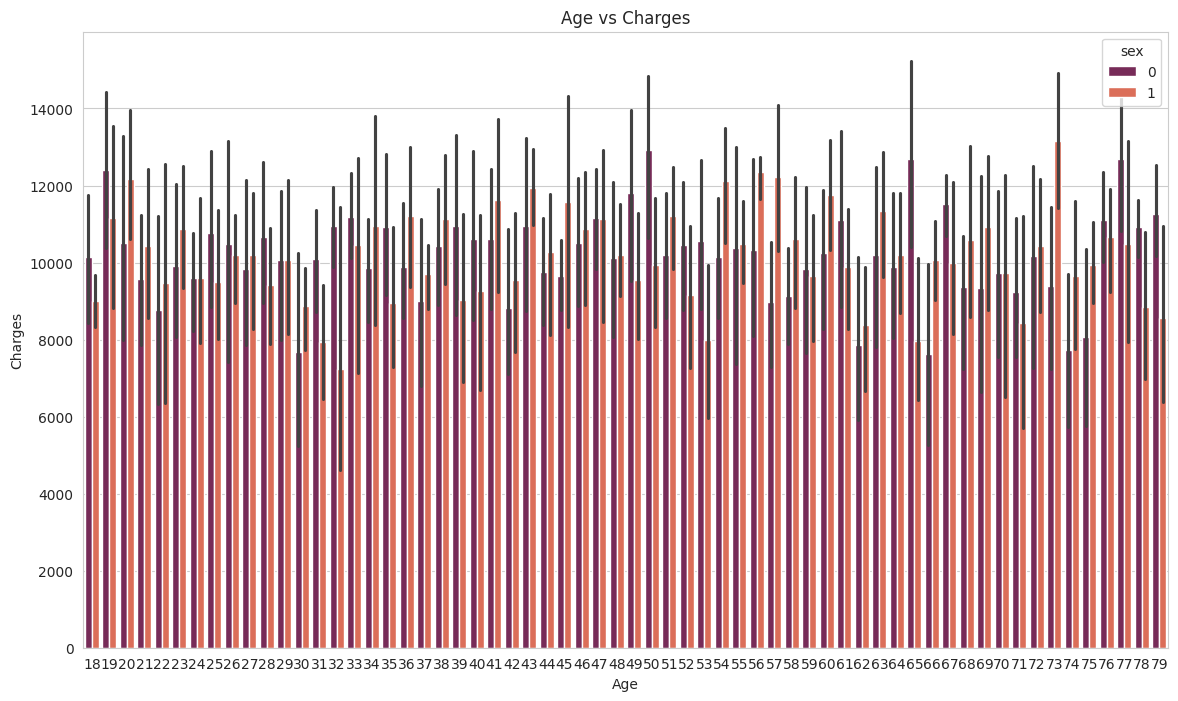

In [162]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x='Age', y='Charges', data=new_df, palette='rocket', hue='sex')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')



*   The highest average charges are associated with the age group 40-49,and the lowest are with the age group 70-79




Text(0.5, 1.0, 'Sex vs Charges')

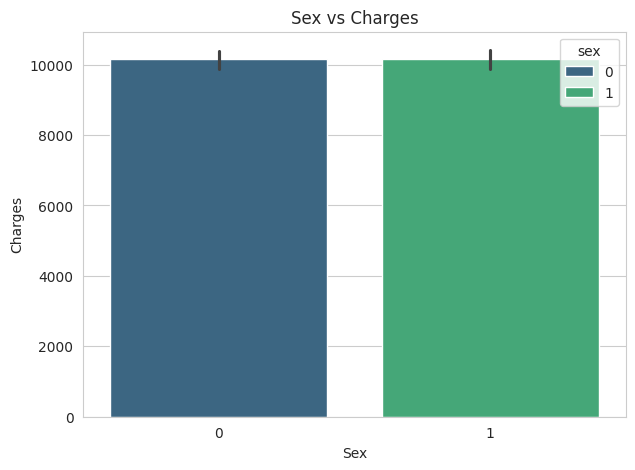

In [163]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.barplot(x='sex', y='Charges', data=df, palette='viridis', hue='sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Sex vs Charges')

*   This plot is a comparison of charges between two categories labeled as ‘0’ represent Female and ‘1’ represent Male.  .
*   Both categories have significant charges, but category ‘0’  has slightly more charges than category ‘1’.

<ipython-input-164-7a76a7ec84b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='Charges',data=new_df,palette='Set3')


<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='Charges'>

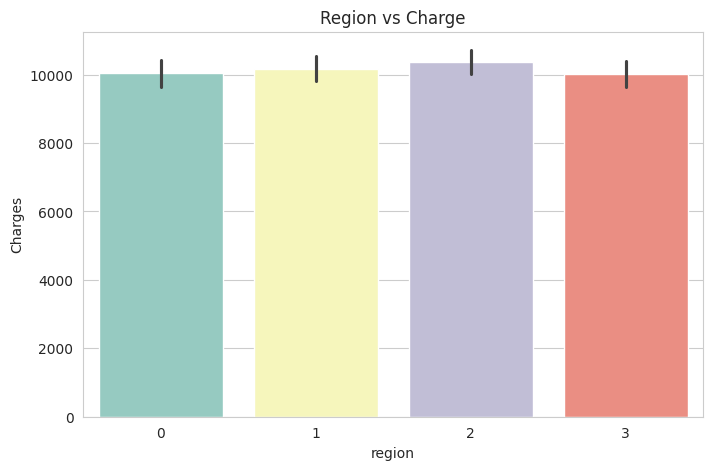

In [164]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
plt.title('Region vs Charge')
sns.barplot(x='region',y='Charges',data=new_df,palette='Set3')

*   The graph shows a comparison of ‘Charges’ across four different ‘Regions’ labeled as 0(East), 1(North), 2(South), and 3(West).
*   Region 2(south) has the highest charge distribution, as its bar reaches closest to the top of the y-axis.
*  Each bar has an error bar on top, suggesting variation in the data or confidence intervals for each region.

Text(0.5, 1.0, 'Region vs Charges')

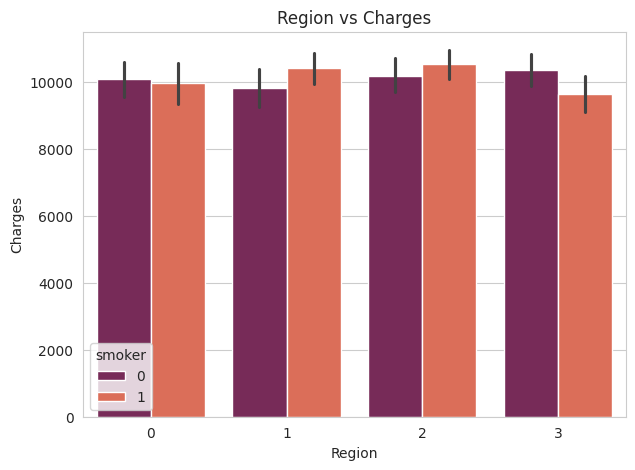

In [165]:
#Check the charges by Region who are smokers
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.barplot(x='region', y='Charges', data=new_df, palette='rocket', hue='smoker')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs Charges')



*  south region contain more smokers compared to other region.
*  west region contain less smokers compared to others.



Text(0.5, 1.0, 'BMI VS Charges')

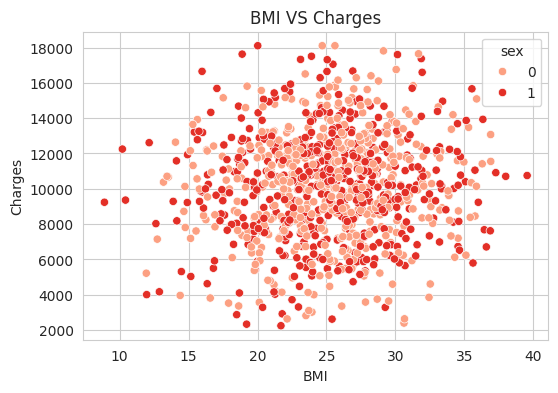

In [166]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.scatterplot(x='BMI',y='Charges',hue='sex',data=new_df,palette='Reds')
plt.title('BMI VS Charges')



*   This graph shows relationship between BMI and charges column.
*  The graph represents BMI, ranging approximately from 15 to 40, and the y-axis represents Charges, ranging approximately from 0 to 18000.   



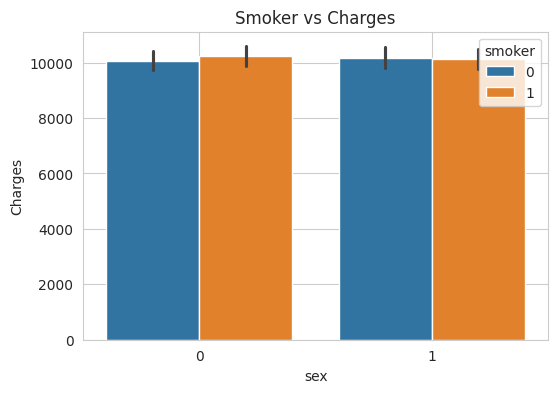

In [167]:
# Plotting smoker vs Charges using a box plot
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='Charges',hue='smoker', data=new_df)
plt.title('Smoker vs Charges')
plt.xlabel('sex')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

This represent charges between smokers(1) and non-smokers(0) of Male(1) and Female(0) .
*  Charges for smokers (orange bars) are consistently higher than for non-smokers (blue bars) in females.

<ipython-input-168-033071f6ab70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='exercise_frequency', y='Charges',palette='viridis', data=new_df)


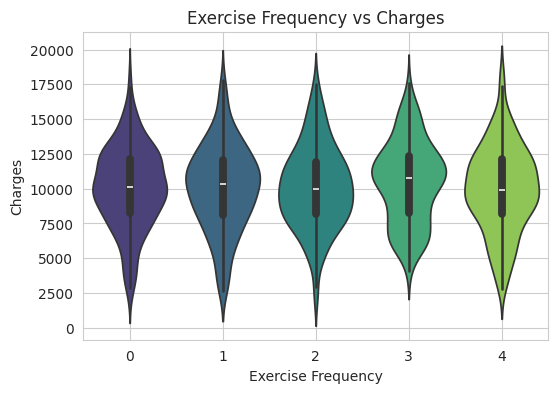

In [168]:
# Plotting exercise frequency vs Charges using violin plot
plt.figure(figsize=(6, 4))
sns.violinplot(x='exercise_frequency', y='Charges',palette='viridis', data=new_df)
plt.title('Exercise Frequency vs Charges')
plt.xlabel('Exercise Frequency')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

*   The graph shows five different levels of exercise frequency, from 0 to 4(2 times/week,Daily,3 times/week,Once a week,Rarely).
*   Each level of exercise frequency has a different distribution of charges. The width of each violin plot indicates the density of data points at different charge levels.
* The median charge appears to increase with higher exercise frequency levels.
* The spread of charges (as indicated by the IQR) varies across different exercise frequencies.
* Exercise frequency level 0(2 times/week) seems to have the widest distribution of charges.

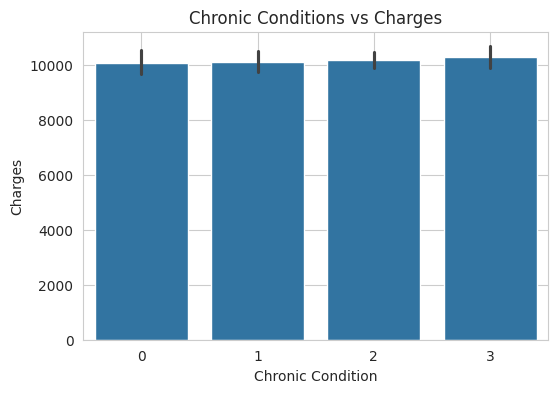

In [169]:
# Plotting chronic conditions vs Charges using a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='chronic_conditions', y='Charges', data=new_df)
plt.title('Chronic Conditions vs Charges')
plt.xlabel('Chronic Condition')
plt.ylabel('Charges')
plt.grid(True)
plt.show()


*  These contain a different number of chronic conditions 0 (Arthritis),1(Diabets),2(Heart Disease),3(High Blood Pressure).
*  Patients with more chronic conditions generally have higher charges.

<ipython-input-170-dae9ec9ab8a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mental_health_status', y='Charges',palette='viridis', data=new_df)


Text(0.5, 1.0, 'Mental Health Status VS Charges')

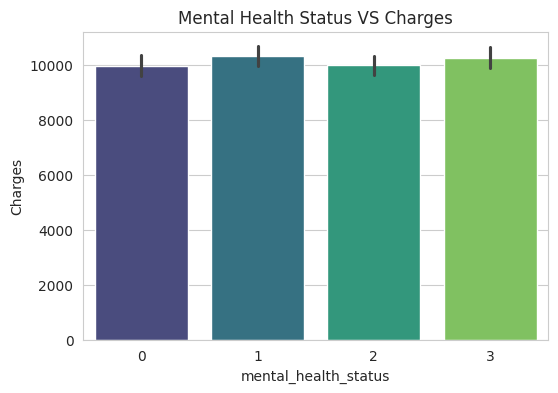

In [170]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x='mental_health_status', y='Charges',palette='viridis', data=new_df)
plt.title('Mental Health Status VS Charges')

*  The x-axis represents mental health status categories labeled as 0(Excellent),1(Fair),2(Poor), and 3(Good).
*  The y-axis represents charges and ranges from 0 to 10,000.  

*   The category1(fair) persons have higher charges compared to others




<ipython-input-171-a7cb0523e4d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_df, x='insurance_plan_type', y='Charges', palette='viridis')


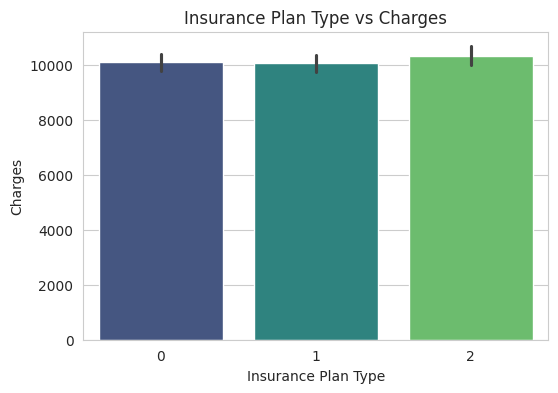

In [171]:
plt.figure(figsize=(6, 4))
sns.barplot(data=new_df, x='insurance_plan_type', y='Charges', palette='viridis')
plt.xlabel('Insurance Plan Type')
plt.ylabel('Charges')
plt.title('Insurance Plan Type vs Charges')
plt.show()

*  The chart compares charges  across three different types of insurance plans such as 0(HDHP),1(HMO),2(PPO).
*  Plan Type 2: Has the highest charges.
*  Plan Type 1 and plan type 0  Follows closely in terms of charges.


<ipython-input-172-db9390458d51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=new_df, x='family_medical_history', y='Charges', palette='rocket')


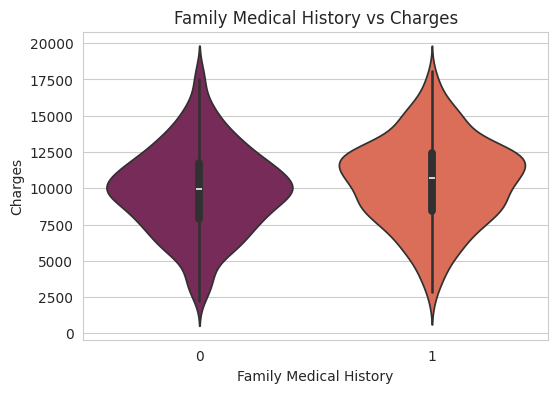

In [172]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.violinplot(data=new_df, x='family_medical_history', y='Charges', palette='rocket')
plt.xlabel('Family Medical History')
plt.ylabel('Charges')
plt.title('Family Medical History vs Charges')
plt.show()


*   The x-axis represents the Family Medical History with two categories: ‘0’ and ‘1’. ‘0’  indicates no family history, and ‘1’ indicates a presence of family medical history.
*   This could indicate that individuals with a family medical history might have higher medical expenses.  

<ipython-input-173-a9f5c68d9ade>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_df, x='income_level', y='Charges', palette='viridis')


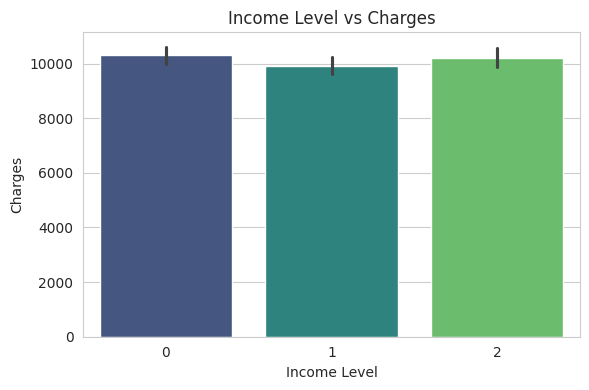

In [173]:
plt.figure(figsize=(6, 4))
sns.barplot(data=new_df, x='income_level', y='Charges', palette='viridis')
plt.xlabel('Income Level')
plt.ylabel('Charges')
plt.title('Income Level vs Charges')
plt.tight_layout()
plt.show()



*  The graph represents three different income levels categorized as 0(High), 1(Low), and 2(Medium) on the x axis.
* The y axis represents charges with increments of 2000 up to 10000.
*  The person who have high income level shows high charges.



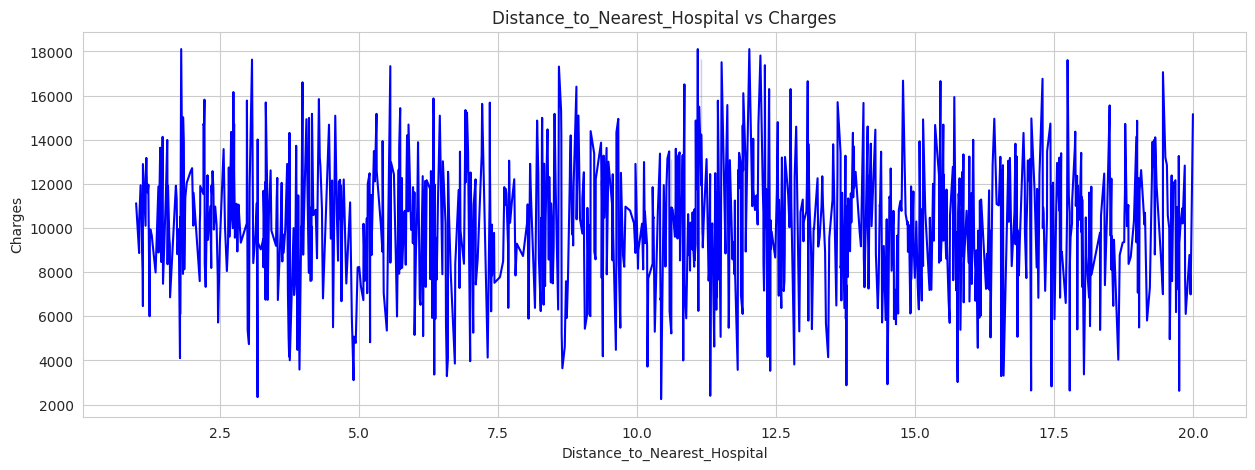

In [174]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
sns.lineplot(data=new_df, x='Distance_to_Nearest_Hospital', y='Charges', color='Blue')
plt.xlabel('Distance_to_Nearest_Hospital')
plt.ylabel('Charges')
plt.title('Distance_to_Nearest_Hospital vs Charges')
plt.show()

*  The data points are densely packed and show a wide distribution of charges at all distances.
*  This could suggest that the charges being compared are not significantly influenced by the distance to the nearest hospital.

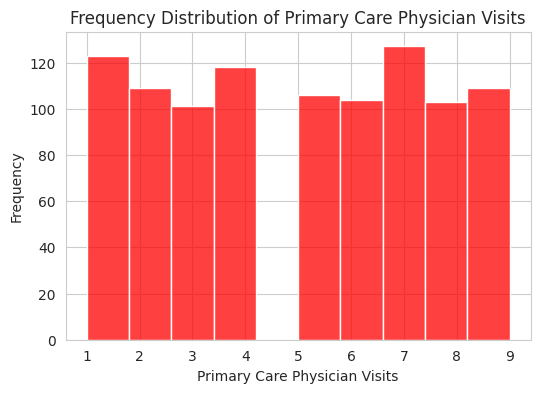

In [175]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Primary_Care_Physician_Visits', bins=10, kde=False, color='red')
plt.title('Frequency Distribution of Primary Care Physician Visits')
plt.xlabel('Primary Care Physician Visits')
plt.ylabel('Frequency')
plt.show()

*   The highest frequency appears to be around 1,4 and 7 visits, as indicated by the tallest bar.
*  There is a gradual decline in frequency as the number of visits increases.
*   The lowest frequency seems to be for 3 visits.

#**Step3:Feature Engineering**



*  It is the process of creating new features or transforming existing features in the dataset to improve the performance of machine learning models.
*  Transform existing features to make them more suitable for modeling.
*   Encode categorical variables if needed (e.g. label encoding).
*   feature selection(select features and target variables)





# **Feature Scaling**

# **StandardScaler**

In [176]:
scaler=StandardScaler()
d=scaler.fit_transform(new_df)
print("original data:\n",new_df)
print("scaled data:\n",d)



original data:
      Age       BMI  Children  Distance_to_Nearest_Hospital  \
0     62  23.39610         4                      5.112872   
1     65  22.03668         4                     19.006750   
2     71  23.03985         1                      9.624294   
3     18  24.82284         0                     11.869340   
4     21  23.44420         1                     15.146110   
..   ...       ...       ...                           ...   
995   75  24.18366         3                      5.041508   
996   24  36.91005         0                     11.672830   
997   37  25.34770         4                     15.267760   
998   52  26.18630         1                     11.871490   
999   68  31.11520         1                     10.205780   

     Primary_Care_Physician_Visits  Healthcare_Utilization    Charges  sex  \
0                                9                    18.0   7604.947    1   
1                                3                     1.0   7067.338    1   
2    

Here we used

*   StandardScaler()for Scaling.
*  The fit() method computes the mean and standard deviation for each feature,and transform()standardizes the features using those computed statistics



In [177]:
#To convert numpy array 'd' to DataFrame 'new_df'
new_data=pd.DataFrame(d, columns=new_df.columns)
new_data

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Healthcare_Utilization,Charges,sex,smoker,region,exercise_frequency,chronic_conditions,insurance_plan_type,income_level,family_medical_history,mental_health_status
0,0.768482,-0.347808,1.457950,-1.014619,1.553146,1.445341,-0.847971,1.028403,0.978237,-1.426171,1.447042,0.390345,-0.001214,0.020946,0.988071,1.334586
1,0.935145,-0.625933,1.457950,1.543738,-0.755793,-1.685459,-1.027252,1.028403,0.978237,-0.502485,-1.341093,0.390345,-1.214785,-1.211173,-1.012073,1.334586
2,1.268470,-0.420694,-0.642843,-0.183906,1.553146,0.892847,-1.890696,1.028403,-1.022247,-0.502485,1.447042,0.390345,-0.001214,1.253065,0.988071,1.334586
3,-1.675905,-0.055910,-1.343107,0.229487,0.783500,-0.212141,0.932778,-0.972381,0.978237,-0.502485,0.052975,-1.581095,1.212358,1.253065,0.988071,1.334586
4,-1.509243,-0.337968,-0.642843,0.832857,0.398677,1.261176,-0.624386,1.028403,-1.022247,-0.502485,0.052975,-1.581095,-1.214785,1.253065,-1.012073,0.415450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.490687,-0.186681,0.757686,-1.027760,-1.525439,1.077011,-0.934672,1.028403,-1.022247,1.344887,0.052975,0.390345,1.212358,0.020946,-1.012073,0.415450
996,-1.342580,2.417021,-1.343107,0.193303,-1.525439,-1.685459,0.975230,-0.972381,-1.022247,-1.426171,-0.644059,-1.581095,-1.214785,1.253065,0.988071,1.334586
997,-0.620374,0.051471,1.457950,0.855257,1.553146,0.524517,0.105243,1.028403,0.978237,-0.502485,-0.644059,1.376065,-0.001214,0.020946,-1.012073,0.415450
998,0.212939,0.223041,-0.642843,0.229883,1.168323,0.708682,-0.950748,-0.972381,-1.022247,1.344887,0.750008,1.376065,-0.001214,1.253065,-1.012073,0.415450


In [178]:
new_data.mean()

Age                             -9.592327e-17
BMI                              8.029133e-16
Children                         3.552714e-18
Distance_to_Nearest_Hospital     1.758593e-16
Primary_Care_Physician_Visits   -1.421085e-16
Healthcare_Utilization           1.136868e-16
Charges                          4.263256e-17
sex                              5.329071e-17
smoker                          -1.065814e-16
region                           7.105427e-18
exercise_frequency               1.172396e-16
chronic_conditions              -9.592327e-17
insurance_plan_type              5.417888e-17
income_level                    -1.776357e-18
family_medical_history           7.105427e-18
mental_health_status            -2.842171e-17
dtype: float64

In [179]:
new_data.std()

Age                              1.0005
BMI                              1.0005
Children                         1.0005
Distance_to_Nearest_Hospital     1.0005
Primary_Care_Physician_Visits    1.0005
Healthcare_Utilization           1.0005
Charges                          1.0005
sex                              1.0005
smoker                           1.0005
region                           1.0005
exercise_frequency               1.0005
chronic_conditions               1.0005
insurance_plan_type              1.0005
income_level                     1.0005
family_medical_history           1.0005
mental_health_status             1.0005
dtype: float64

# **Selection of Feature And Target Variable**

In [180]:
#selecting Independent(Features)and Dependent(Target) variables
features = new_data[['Age','BMI','Distance_to_Nearest_Hospital','Primary_Care_Physician_Visits','sex','smoker','region','exercise_frequency','chronic_conditions',
                   'insurance_plan_type','income_level','family_medical_history','mental_health_status']]
target = new_data['Charges']
print(features.head())
print(target.head())


        Age       BMI  Distance_to_Nearest_Hospital  \
0  0.768482 -0.347808                     -1.014619   
1  0.935145 -0.625933                      1.543738   
2  1.268470 -0.420694                     -0.183906   
3 -1.675905 -0.055910                      0.229487   
4 -1.509243 -0.337968                      0.832857   

   Primary_Care_Physician_Visits       sex    smoker    region  \
0                       1.553146  1.028403  0.978237 -1.426171   
1                      -0.755793  1.028403  0.978237 -0.502485   
2                       1.553146  1.028403 -1.022247 -0.502485   
3                       0.783500 -0.972381  0.978237 -0.502485   
4                       0.398677  1.028403 -1.022247 -0.502485   

   exercise_frequency  chronic_conditions  insurance_plan_type  income_level  \
0            1.447042            0.390345            -0.001214      0.020946   
1           -1.341093            0.390345            -1.214785     -1.211173   
2            1.447042           

# **Step4:Data Splitting**

*    Split the dataset into training and testing sets to evaluate model
performance with a ration of 80-20.

In [181]:
#Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)


Shape of X_train: (800, 13)
Shape of X_test: (200, 13)
Shape of y_train: (800,)
Shape of y_test: (200,)


*    We can split the data into training and testing sets using the train_test_split function from the scikit-learn library.
*   "test_size=0.2" specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training.
*   "random_state" is used to ensure reproducibility. Setting it to a fixed value (e.g., 42) ensures that the data split is the same every time you run the code.
*   X_train and y_train will contain the features and target variable for the training set.
*   X_test and y_test will contain the features and target variable for the testing set.

# **step5:Model Selection**

# **Machine Learning**
* Machine learning (ML) is a subfield of artificial intelligence (AI) that focuses on developing algorithms and statistical models that enable computers to learn from and make predictions or decisions based on data, without being explicitly programmed to perform specific tasks.
*   From the problem statement we got that we have to predict the medical insurance cost for patients.
*   In machine learning, regression is used for predictions.
*   The regression models used:
>
              - Linear Regression
              - Decision Tree
              - Random Forest
              - Support Vector Machine(SVM)
              - Gradient Boosting
              - Lasso Regression

# **Step6:Model Training**

# **1.Linear Regression**

*  Linear regression is a fundamental supervised machine learning algorithm used for predicting numerical values based on input features.  
* It find a linear relationship between the features and the target variable.
* The model learns the coefficients that best fit the data and can make predictions for new inputs.

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
features=pd.get_dummies(features,drop_first=True)
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred_linear=model.predict(X_test)


In [183]:
#Calculating the mean squared error
mse=mean_squared_error(y_test,y_pred_linear)
#calculating the root mean squared error
rmse=np.sqrt(mse)
#calculating mean absalute error
mae = mean_absolute_error(y_test, y_pred_linear)
#calculating the r2 score
r2=r2_score(y_test,y_pred_linear)
print("Mean squared error :",mse)
print("Root mean squared error:",rmse)
print("Mean absolute error:",mae)
print("r2 score:",r2)


Mean squared error : 1.1236131206309234
Root mean squared error: 1.060006188958783
Mean absolute error: 0.8512232057152951
r2 score: -0.025841336360235445


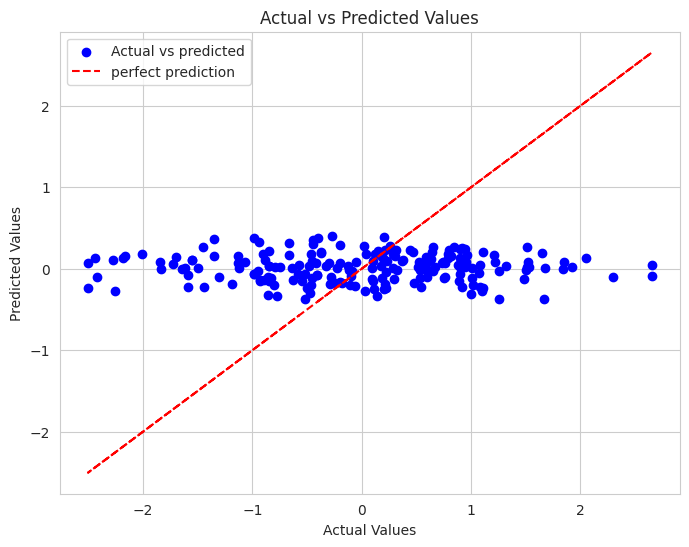

In [184]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred_linear, color='blue',label='Actual vs predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='perfect prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## **2.Support Vector Machine**

*  Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.
*   SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes

In [185]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
features=pd.get_dummies(features,drop_first=True)
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
model=SVR(kernel='linear')
model.fit(X_train,y_train)
y_pred_svm=model.predict(X_test)

In [186]:
#Calculating the mean squared error
mse=mean_squared_error(y_test,y_pred_svm)
#calculating the root mean squared error
rmse=np.sqrt(mse)
#calculating mean absalute error
mae = mean_absolute_error(y_test, y_pred_svm)
#calculating the r2 score
r2=r2_score(y_test,y_pred_svm)
print("Mean squared error :",mse)
print("Root mean squared error:",rmse)
print("Mean absolute error:",mae)
print("r2 score:",r2)

Mean squared error : 1.1256473341292468
Root mean squared error: 1.060965284130092
Mean absolute error: 0.844312931398816
r2 score: -0.027698541705426072


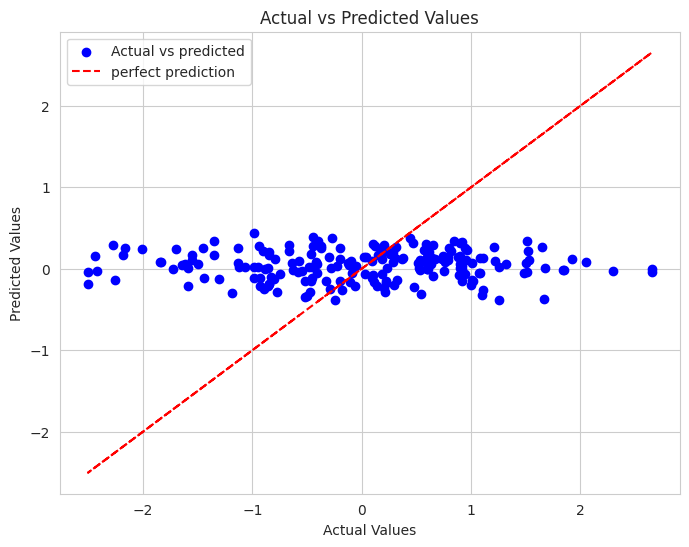

In [187]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred_svm, color='blue',label='Actual vs predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='perfect prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 3.**Decision Tree**

*  Decision trees are a popular  supervised machine learning algorithm that can be used for both regression and classification tasks.
*  In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node.
*  The decisions or the test are performed on the basis of features of the given dataset.

In [188]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
features=pd.get_dummies(features,drop_first=True)
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
model=DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)
y_pred_tree=model.predict(X_test)

In [189]:
#Calculating the mean squared error
mse=mean_squared_error(y_test,y_pred_tree)
#calculating the root mean squared error
rmse=np.sqrt(mse)
#calculating mean absalute error
mae = mean_absolute_error(y_test, y_pred_tree)
#calculating the r2 score
r2=r2_score(y_test,y_pred_tree)
print("Mean squared error :",mse)
print("Root mean squared error:",rmse)
print("Mean absolute error:",mae)
print("r2 score:",r2)

Mean squared error : 2.2442657732221107
Root mean squared error: 1.4980873716916883
Mean absolute error: 1.1530602193703476
r2 score: -1.0489798113579858


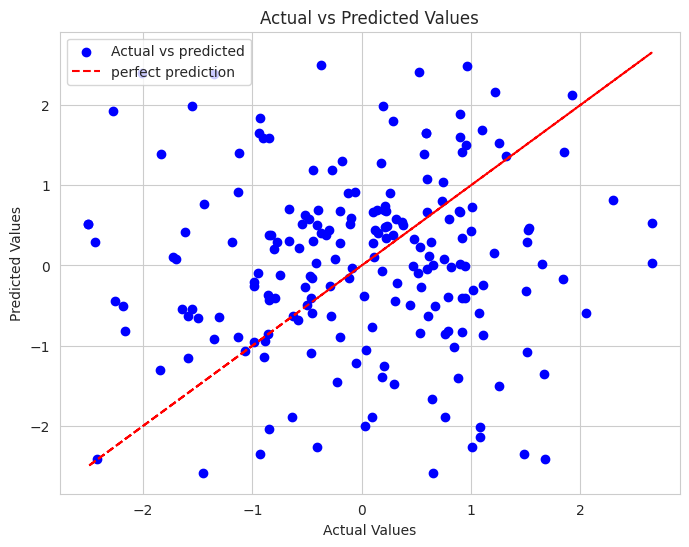

In [190]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred_tree, color='blue',label='Actual vs predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='perfect prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# **4. Random Forest**

*   Random forest regression is a supervised learning algorithm and bagging technique that uses an ensemble learning method for regression in machine learning.
*  The trees in random forests run in parallel, meaning there is no interaction between these trees while building the trees.

In [191]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
features = new_data[['Age','BMI','Distance_to_Nearest_Hospital','Primary_Care_Physician_Visits','sex','smoker','region','exercise_frequency','chronic_conditions',
                   'insurance_plan_type','income_level','family_medical_history','mental_health_status']]
target = new_data['Charges']
features=pd.get_dummies(features,drop_first=True)
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
model=RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)
y_pred_forest=model.predict(X_test)

In [192]:
#Calculating the mean squared error
mse=mean_squared_error(y_test,y_pred_forest)
#calculating the root mean squared error
rmse=np.sqrt(mse)
#calculating mean absalute error
mae = mean_absolute_error(y_test, y_pred_forest)
#calculating the r2 score
r2=r2_score(y_test,y_pred_forest)
print("Mean squared error :",mse)
print("Root mean squared error:",rmse)
print("Mean absolute error:",mae)
print("r2 score:",r2)

Mean squared error : 1.0918045275014967
Root mean squared error: 1.0448945054413372
Mean absolute error: 0.8296385293213377
r2 score: 0.0031994153758315713


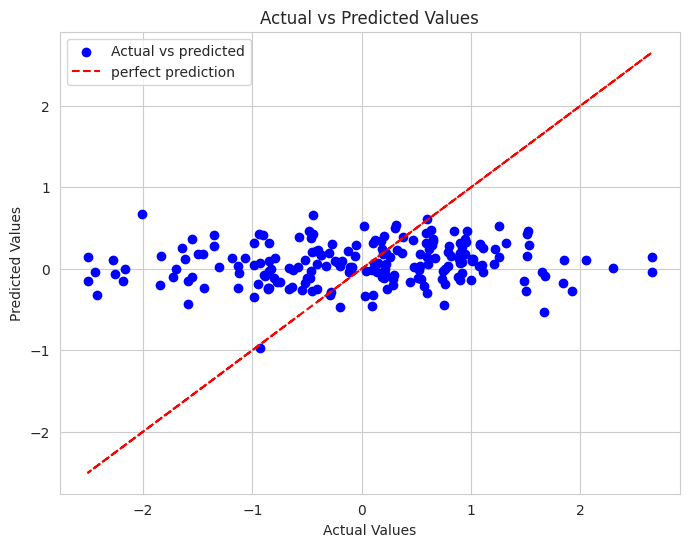

In [193]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred_forest, color='blue',label='Actual vs predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='perfect prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# **5.Gradient Boosting Regressor**

*   Gradient Boosting Machine (GBM) is considered one of the most powerful boosting algorithms.
*   Boosting is one of the popular learning ensemble modeling techniques used to build strong classifiers from various weak classifiers.

In [194]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
features=pd.get_dummies(features,drop_first=True)
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
model=GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred_gb=model.predict(X_test)

In [195]:
#Calculating the mean squared error
mse=mean_squared_error(y_test,y_pred_gb)
#calculating the root mean squared error
rmse=np.sqrt(mse)
#calculating mean absalute error
mae = mean_absolute_error(y_test, y_pred_gb)
#calculating the r2 score
r2=r2_score(y_test,y_pred_gb)
print("Mean squared error :",mse)
print("Root mean squared error:",rmse)
print("Mean absolute error:",mae)
print("r2 score:",r2)

Mean squared error : 1.1601537331570047
Root mean squared error: 1.0771043278889025
Mean absolute error: 0.852122886098623
r2 score: -0.05920234834639704


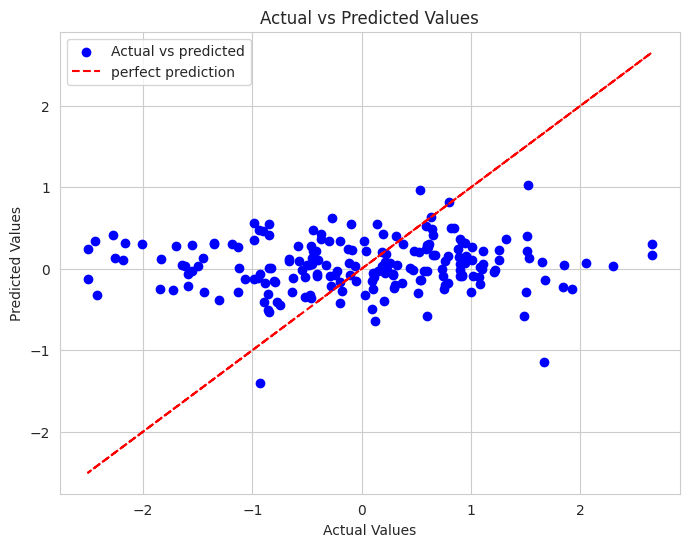

In [196]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred_gb, color='blue',label='Actual vs predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='perfect prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# **6.Lasso Regression model**

* lasso regression is a powerful technique for linear regression tasks, especially when dealing with high-dimensional datasets and when feature selection is desired.
* It provides a simple yet effective way to control  model complexity and improve generalization performance

In [197]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
features=pd.get_dummies(features,drop_first=True)
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
model=Lasso()
model.fit(X_train,y_train)
y_pred_lasso=model.predict(X_test)

In [198]:
#Calculating the mean squared error
mse=mean_squared_error(y_test,y_pred_lasso)
#calculating the root mean squared error
rmse=np.sqrt(mse)
#calculating mean absalute error
mae = mean_absolute_error(y_test, y_pred_lasso)
#calculating the r2 score
r2=r2_score(y_test,y_pred_lasso)
print("Mean squared error :",mse)
print("Mean absolute eoor:",mae)
print("Root mean squared error:",rmse)
print("r2 score:",r2)

Mean squared error : 1.0953109328836899
Mean absolute eoor: 0.8510377467463993
Root mean squared error: 1.0465710357561449
r2 score: -1.878305279978676e-06


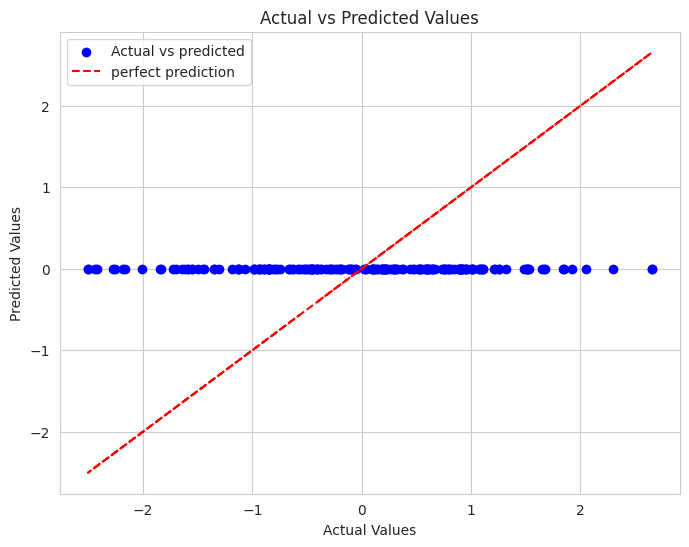

In [199]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred_lasso, color='blue',label='Actual vs predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='perfect prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

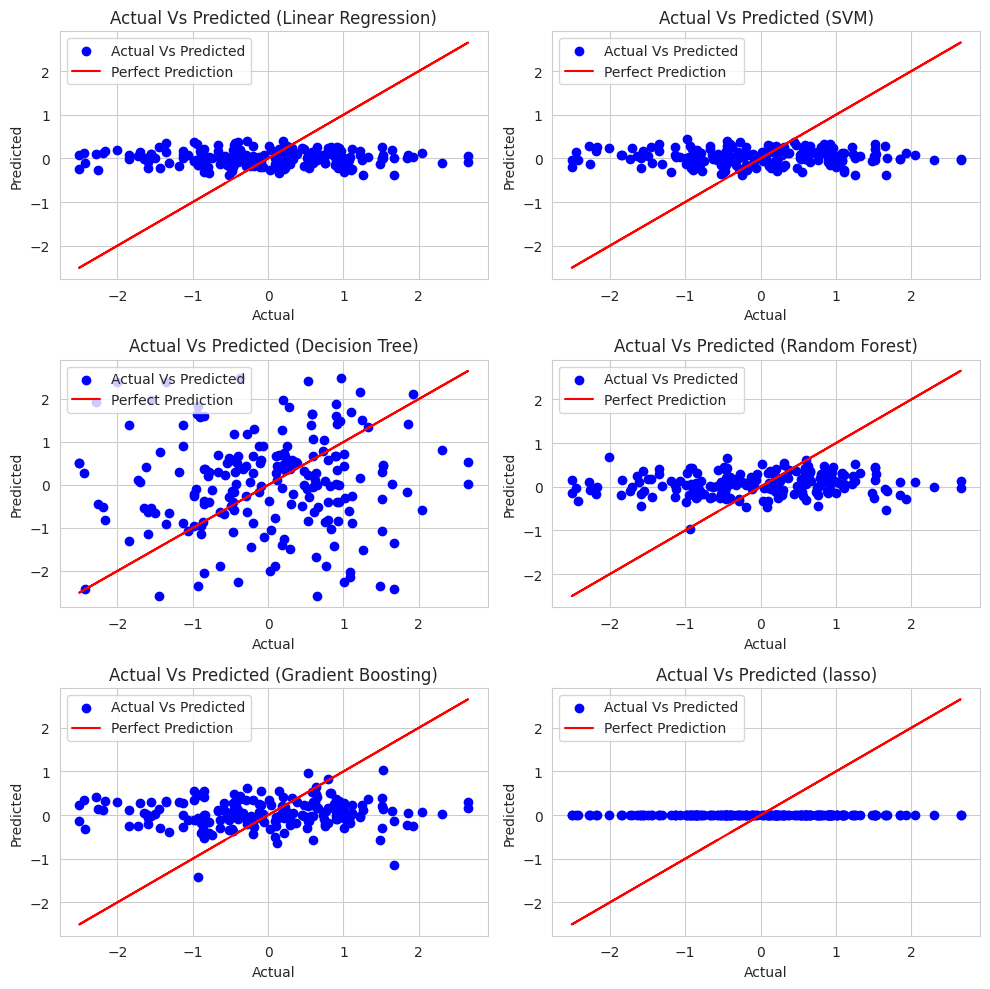

In [200]:
models=[
    ('Linear Regression',y_pred_linear),
     ('SVM',y_pred_svm),
    ('Decision Tree',y_pred_tree),
    ('Random Forest',y_pred_forest),
    ('Gradient Boosting',y_pred_gb),
    ('lasso',y_pred_lasso)
]
fig,axes=plt.subplots(3,2,figsize=(10,10))
axes=axes.flatten()
for i,(model_name,y_pred_model) in enumerate(models):
  ax=axes[i]
  ax.scatter(y_test,y_pred_model,color='blue',label='Actual Vs Predicted')
  ax.plot(y_test,y_test,color='red',label='Perfect Prediction')
  ax.set_title(f'Actual Vs Predicted ({model_name})')
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  ax.legend()
plt.tight_layout()
plt.show()



*  Each model has been trained and used to predict values.
*   it creates subplots of 3rows and 2columns



# **Step 7:Model Evaluation**

In [201]:
models=[("Linear Regression",LinearRegression()),("Decision Tree",DecisionTreeRegressor(random_state=42)),("Support Vector Machine",SVR(kernel='linear')),
        ("Random Forest",RandomForestRegressor(random_state=42)),("Gradient Boosting Regressor",GradientBoostingRegressor()),("Lasso Regression",Lasso())]
results = []
for name,model in models:
    model.fit(X_train,y_train)
    y_pred =model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    results.append([name,mse,rmse,r2])
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'R-squared'])
print("Model Comparison:")
print(results_df)

Model Comparison:
                         Model       MSE      RMSE  R-squared
0            Linear Regression  1.123613  1.060006  -0.025841
1                Decision Tree  2.244266  1.498087  -1.048980
2       Support Vector Machine  1.125647  1.060965  -0.027699
3                Random Forest  1.091805  1.044895   0.003199
4  Gradient Boosting Regressor  1.154917  1.074671  -0.054421
5             Lasso Regression  1.095311  1.046571  -0.000002


*   The comparison allows us to understand which regression model performs better on the given dataset in terms of predicting the target variable.

#**Choosing Best Model**

In [202]:
best_mse = results_df['MSE'].idxmin()
best_rmse = results_df['RMSE'].idxmin()
best_r2 = results_df['R-squared'].idxmax()
best_model = results_df.loc[[best_mse, best_rmse,best_r2]].iloc[0]
print("\nBest performing models base on Model Evaluation:")
print(best_model)


Best performing models base on Model Evaluation:
Model        Random Forest
MSE               1.091805
RMSE              1.044895
R-squared         0.003199
Name: 3, dtype: object


*  It shows index of the row with the minimum MSE (best_mse) and the index of the row with the maximum R-squared (best_r2) from the DataFrame r.
*  Using the indices found in the previous step, the code retrieves the information of the best-performing model from the DataFrame r and stores it in best_model.
*  The iloc function is used to locate the row with the specified indices.

# **Step8:Model Deployement**

In [203]:
#Model Retraining
from sklearn.ensemble import RandomForestRegressor
import numpy as np
x = new_df.drop(['Children','Healthcare_Utilization','Charges'],axis=1)
y = new_df['Charges']
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(x,y)


RandomForestRegressor(random_state=42)

#Save the training model

In [204]:
import joblib
model = 'random_forest_model.pkl'
joblib.dump(random_forest_model, model)
print("Random Forest model saved successfully to:", model)

Random Forest model saved successfully to: random_forest_model.pkl


In [205]:
data={'Age':30,
      'BMI':36.21,
      'Distance_to_Nearest_Hospital':11.25,
       'Primary_Care_Physician_Visits':2,
       'sex':1,
       'smoker':0,
       'region':2,
      'exercise_frequency':2,
      'chronic_conditions':1,
      'insurance_plan_type':1,
      'income_level':0,
      'family_medical_history':1,
       'mental_health_status':3}

dfs=pd.DataFrame(data,index=[0])
dfs

,Age,BMI,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,sex,smoker,region,exercise_frequency,chronic_conditions,insurance_plan_type,income_level,family_medical_history,mental_health_status
0,30,36.21,11.25,2,1,0,2,2,1,1,0,1,3


In [206]:
model=joblib.load('random_forest_model.pkl')
model.predict(dfs)

array([10584.2263])

# CONCLUSION

* Provide extra resources and support for high-risk age groups, like 40-49 years, with preventive care and health education.  
*  Design healthcare programs addressing the specific needs of females who face slightly higher charges.
*  Develop region-specific healthcare strategies to address regional health disparities and enhance healthcare infrastructure.
*   Educate patients about insurance plans and collaborate with providers to optimize reimbursement processes.
*   Prioritize family medical history screening during patient assessments and offer genetic counseling services.
*    Ensure healthcare services are accessible to all income levels, possibly through sliding scale fee structures or financial assistance programs.